In [57]:
import pandas as pd

In [106]:
df_old=pd.read_excel("/home/andy/Desktop/xyz.xlsx",index_col=0)
df_old.fillna("0",inplace=True)

In [107]:
single_sentences_len=0
less_than_5=0
good_signlas_len=0
for i in range(len(df_old)):
    if df_old["signal_text"][i] != "0":
        if len(df_old["signal_text"][i].split()) <2:
            single_sentences_len+=1
        elif len(df_old["signal_text"][i].split())>=2 and len(df_old["signal_text"][i].split())<=5:
            less_than_5+=1
        else:
            good_signlas_len+=1
        

In [108]:
single_sentences_len

926

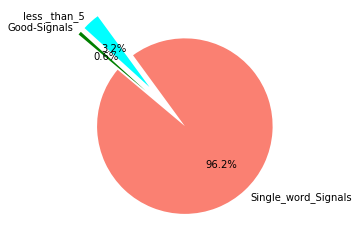

<Figure size 432x288 with 0 Axes>

In [112]:
import matplotlib.pyplot as plt


# Data to plot
# f= plt.figure()
labels = 'Single_word_Signals', 'less _than_5',"Good-Signals"
sizes = [single_sentences_len, less_than_5,good_signlas_len]
colors = ['salmon', 'aqua','green']
explode = (0.1,0.5,0.5)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()
plt.savefig('/home/andy/Desktop/signal_analysis_old.jpg')

# f.savefig("/home/andy/Desktop/signal_analysis_old.pdf", bbox_inches='tight')

In [194]:
df_old.describe()

,snippet_id,task_id
count,2.509000e+03,2.509000e+03
mean,3.120480e+06,1.827623e+07
std,4.268164e+05,3.032868e+04
min,2.346505e+06,1.820802e+07
25%,3.017299e+06,1.827269e+07
50%,3.029934e+06,1.827348e+07
75%,3.234044e+06,1.829001e+07
max,4.560115e+06,1.835448e+07


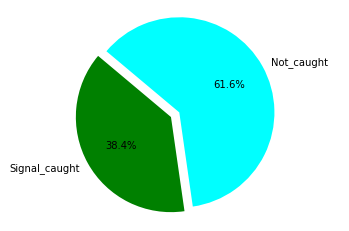

In [81]:
signal_caught=0
not_caught=0
for i in range(len(df_old)):
    if df_old.signal_text[i] != '0':
        signal_caught+=1
    else:
        not_caught+=1

f= plt.figure()
labels = 'Signal_caught', 'Not_caught'
sizes = [signal_caught, not_caught]
colors = ['green', 'aqua']
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()
f.savefig("/home/andy/Desktop/analysis.pdf", bbox_inches='tight')

In [94]:
df_old.columns.to_list()

['snippet_id',
 'speaker',
 'text',
 'task_id',
 'signal_generated_id',
 'name',
 'score',
 'match_method',
 'signal_text']

In [122]:
len(df_old['signal_generated_id'].unique())

65

In [120]:
len(df_old['snippet_id'].unique())

1822

In [123]:
1822/65

28.03076923076923

In [131]:
cached_snippet_ids=[]
caught_singals=0
for i in range(len(df_old)):
    if df_old["signal_generated_id"][i] != '0':
        caught_singals+=1
        if len(cached_snippet_ids)==0:
            cached_snippet_ids.append(df_old['snippet_id'][i])
        else:
            if df_old['snippet_id'][i] not in cached_snippet_ids:
                cached_snippet_ids.append(df_old["snippet_id"][i])
        
        
    

In [132]:
len(cached_snippet_ids)

276

In [133]:
caught_singals

963

In [193]:
963/276

3.489130434782609

In [139]:
tmp_dict={}
for unique_id in cached_snippet_ids:
    tmp_dict[int(unique_id)]=[]
    for i in range(len(df_old)):
        if unique_id==df_old["snippet_id"][i]:
            tmp_dict[int(unique_id)].append(int(df_old["signal_generated_id"][i]))
    

In [143]:
final_dict={}
for key in tmp_dict.keys():
    final_dict[key]=len(tmp_dict[key])
    

In [152]:
x=list(final_dict.keys())
y=list(final_dict.values())

In [165]:
import numpy as np
import seaborn as sns

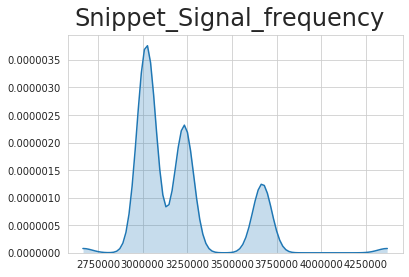

In [192]:
data=[]
for i in range(len(y)):
    data.extend([x[i]]*y[i])
sns.set_style('whitegrid')
fig=sns.kdeplot(data=np.array(data), bw=0.2,shade=True)
fig.figure.suptitle("Snippet_Signal_frequency", fontsize = 24)
fig.figure.savefig("/home/andy/Desktop/snippet_signal_frequency.png")


[0, 0, 1, 1, 1]